In [31]:
import os


import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Linear Regression Projects\Fish Market\Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

# EDA

## Target Variable

### 1. Weight

In [12]:
df.Weight

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [14]:
df.Weight.value_counts()

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

In [15]:
df.Weight.isnull().sum()

0

<AxesSubplot:xlabel='Weight', ylabel='count'>

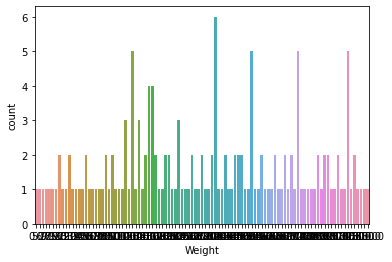

In [16]:
sns.countplot(df.Weight)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

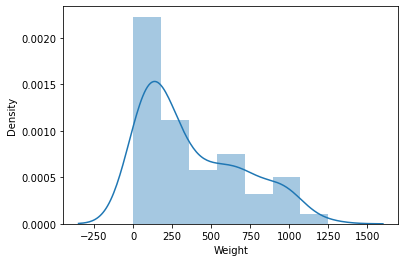

In [26]:
sns.distplot(df.Weight)

<AxesSubplot:xlabel='Weight'>

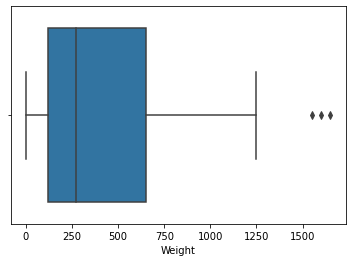

In [17]:
sns.boxplot(df.Weight)

In [19]:
Q3 = df.Weight.quantile(0.75)
Q1 = df.Weight.quantile(0.25)
IQR = Q3 - Q1

UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)
print('UL: ',UL)
print('LL: ',LL)

UL:  1445.0
LL:  -675.0


<AxesSubplot:xlabel='Weight'>

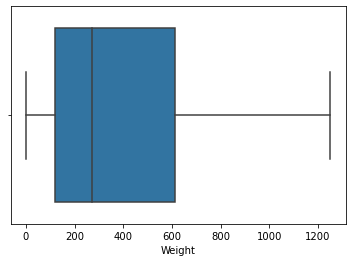

In [21]:
filt = df.Weight > 1445.0
df.drop(index = df[filt].index, inplace = True)
sns.boxplot(df.Weight)

### 2. length1

In [22]:
df.Length1

0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 156, dtype: float64

In [23]:
df.Length1.value_counts()

19.0    6
20.0    5
20.5    4
22.0    4
25.4    3
       ..
25.6    1
24.1    1
22.1    1
21.1    1
13.2    1
Name: Length1, Length: 114, dtype: int64

In [24]:
df.Length1.isnull().sum()

0

<AxesSubplot:xlabel='Length1', ylabel='Density'>

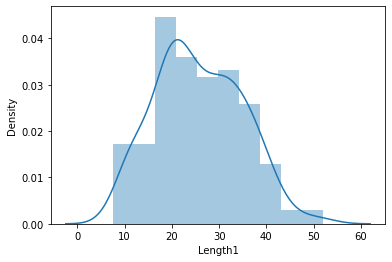

In [25]:
sns.distplot(df.Length1)

<AxesSubplot:xlabel='Length1'>

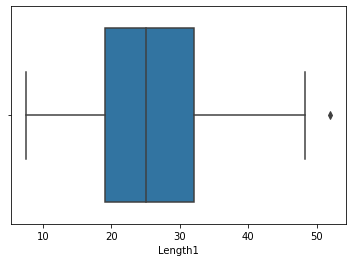

In [27]:
sns.boxplot(df.Length1)

In [28]:
Q3 = df.Length1.quantile(0.75)
Q1 = df.Length1.quantile(0.25)
IQR = Q3 - Q1

UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)
print('UL: ',UL)
print('LL: ',LL)

UL:  51.8125
LL:  -0.6875


<AxesSubplot:xlabel='Length1'>

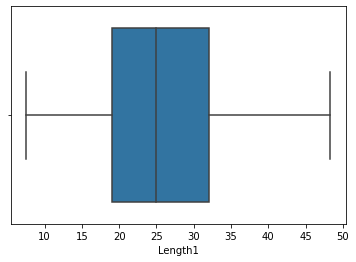

In [29]:
filt = df.Length1 > 51.8125
df.drop(index = df[filt].index, inplace = True)
sns.boxplot(df.Length1)

In [32]:
corr,_ = pearsonr(df.Length1, df.Weight)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.890


### 0.890 Correlation with Weight

### 3. Length2

In [33]:
df.Length2

0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
5      29.7
6      29.7
7      30.0
8      30.0
9      30.7
10     31.0
11     31.0
12     31.5
13     32.0
14     32.0
15     32.0
16     33.0
17     33.0
18     33.5
19     33.5
20     34.0
21     34.0
22     34.5
23     35.0
24     35.0
25     35.0
26     35.0
27     36.0
28     36.0
29     37.0
30     38.5
31     38.5
32     39.5
33     41.0
34     41.0
35     14.1
36     18.2
37     18.8
38     19.8
39     20.0
40     20.5
41     20.8
42     21.0
43     22.0
44     22.0
45     22.5
46     22.5
47     22.5
48     24.0
49     23.4
50     23.5
51     25.2
52     26.0
53     27.0
54     31.7
55     26.0
56     26.5
57     28.0
58     31.0
59     36.4
60     40.0
61     14.7
62     15.5
63     17.7
64     19.0
65     20.0
66     20.7
67     20.7
68     21.5
69     23.0
70     25.0
71     26.0
72      8.4
73     13.7
74     15.0
75     16.2
76     17.4
77     18.0
78     18.7
79     19.0
80     19.6
81     20.0
82     21.0
83  

In [34]:
df.Length2.value_counts()

22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
39.0    3
43.0    3
26.0    3
24.0    3
20.0    3
38.5    3
37.0    3
36.0    3
27.5    3
31.0    3
34.0    3
30.0    3
26.5    3
32.0    3
19.0    2
20.7    2
29.7    2
28.0    2
23.0    2
25.0    2
23.5    2
15.0    2
34.5    2
29.0    2
11.8    2
41.0    2
33.0    2
33.5    2
42.5    2
43.5    1
44.0    1
32.3    1
42.0    1
36.5    1
32.8    1
28.7    1
37.3    1
48.0    1
38.0    1
45.0    1
46.0    1
51.7    1
9.8     1
10.5    1
13.0    1
27.3    1
12.4    1
10.6    1
11.0    1
11.2    1
11.3    1
12.0    1
12.2    1
25.4    1
21.5    1
25.6    1
24.6    1
30.7    1
31.5    1
39.5    1
14.1    1
18.2    1
18.8    1
19.8    1
20.5    1
20.8    1
23.4    1
25.2    1
27.0    1
31.7    1
36.4    1
14.7    1
15.5    1
17.7    1
26.3    1
8.4     1
13.7    1
16.2    1
17.4    1
18.0    1
18.7    1
19.6    1
21.3    1
22.7    1
14.3    1
Name: Length2, dtype: int64

In [35]:
df.Length2.isnull().sum()

0

<AxesSubplot:xlabel='Length2', ylabel='Density'>

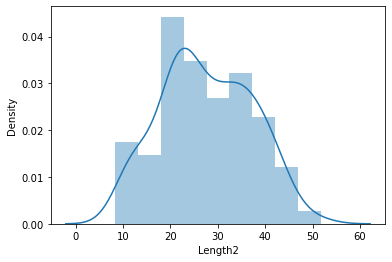

In [36]:
sns.distplot(df.Length2)

<AxesSubplot:xlabel='Length2'>

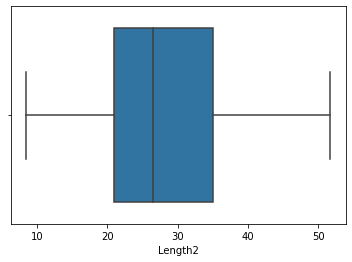

In [37]:
sns.boxplot(df.Length2)

In [39]:
corr,_ = pearsonr(df.Length2, df.Weight)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.894


### Pearsons Correlation: 0.894

### 3. Length3

In [40]:
df.Length3

0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
5      34.7
6      34.5
7      35.0
8      35.1
9      36.2
10     36.2
11     36.2
12     36.4
13     37.3
14     37.2
15     37.2
16     38.3
17     38.5
18     38.6
19     38.7
20     39.5
21     39.2
22     39.7
23     40.6
24     40.5
25     40.9
26     40.6
27     41.5
28     41.6
29     42.6
30     44.1
31     44.0
32     45.3
33     45.9
34     46.5
35     16.2
36     20.3
37     21.2
38     22.2
39     22.2
40     22.8
41     23.1
42     23.7
43     24.7
44     24.3
45     25.3
46     25.0
47     25.0
48     27.2
49     26.7
50     26.8
51     27.9
52     29.2
53     30.6
54     35.0
55     28.7
56     29.3
57     30.8
58     34.0
59     39.6
60     43.5
61     16.5
62     17.4
63     19.8
64     21.3
65     22.4
66     23.2
67     23.2
68     24.1
69     25.8
70     28.0
71     29.0
72      8.8
73     14.7
74     16.0
75     17.2
76     18.5
77     19.2
78     19.4
79     20.2
80     20.8
81     21.0
82     22.5
83  

In [41]:
df.Length3.value_counts()

23.5    5
34.0    3
22.5    3
45.5    3
36.2    3
28.9    3
25.0    3
22.2    2
23.2    2
42.5    2
41.4    2
22.8    2
16.2    2
28.7    2
25.5    2
40.5    2
40.6    2
35.0    2
24.0    2
28.0    2
38.3    2
37.2    2
11.6    2
37.3    2
13.1    2
24.2    1
20.2    1
20.8    1
39.3    1
39.4    1
21.0    1
39.0    1
31.6    1
36.5    1
30.1    1
29.4    1
27.0    1
26.5    1
26.2    1
24.5    1
41.3    1
30.0    1
42.3    1
42.4    1
13.8    1
13.5    1
13.4    1
13.2    1
12.6    1
12.4    1
12.0    1
10.8    1
55.1    1
51.2    1
48.7    1
48.0    1
45.8    1
41.0    1
39.8    1
38.8    1
37.8    1
34.8    1
46.6    1
46.0    1
19.2    1
45.2    1
44.6    1
19.4    1
25.8    1
18.5    1
17.2    1
21.2    1
20.3    1
46.5    1
45.9    1
45.3    1
44.0    1
44.1    1
42.6    1
41.6    1
41.5    1
40.9    1
39.7    1
39.2    1
39.5    1
38.7    1
38.6    1
38.5    1
36.4    1
35.1    1
34.5    1
34.7    1
33.5    1
31.1    1
23.1    1
23.7    1
24.7    1
16.5    1
16.0    1
14.7    1


In [42]:
df.Length3.isnull().sum()

0

<AxesSubplot:xlabel='Length3', ylabel='Density'>

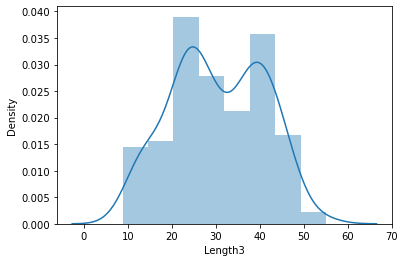

In [43]:
sns.distplot(df.Length3)

<AxesSubplot:xlabel='Length3'>

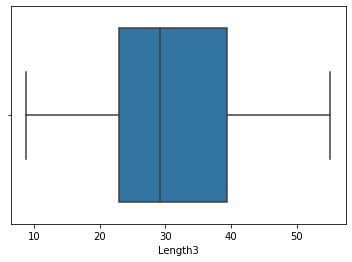

In [44]:
sns.boxplot(df.Length3)

In [45]:
corr,_ = pearsonr(df.Length3, df.Weight)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.903


### Pearsons Correlation: 0.903

### 4. Height

In [46]:
df.Height

0      11.5200
1      12.4800
2      12.3778
3      12.7300
4      12.4440
5      13.6024
6      14.1795
7      12.6700
8      14.0049
9      14.2266
10     14.2628
11     14.3714
12     13.7592
13     13.9129
14     14.9544
15     15.4380
16     14.8604
17     14.9380
18     15.6330
19     14.4738
20     15.1285
21     15.9936
22     15.5227
23     15.4686
24     16.2405
25     16.3600
26     16.3618
27     16.5170
28     16.8896
29     18.9570
30     18.0369
31     18.0840
32     18.7542
33     18.6354
34     17.6235
35      4.1472
36      5.2983
37      5.5756
38      5.6166
39      6.2160
40      6.4752
41      6.1677
42      6.1146
43      5.8045
44      6.6339
45      7.0334
46      6.5500
47      6.4000
48      7.5344
49      6.9153
50      7.3968
51      7.0866
52      8.8768
53      8.5680
54      9.4850
55      8.3804
56      8.1454
57      8.7780
58     10.7440
59     11.7612
60     12.3540
61      6.8475
62      6.5772
63      7.4052
64      8.3922
65      8.8928
66      8.

In [47]:
df.Height.value_counts()

11.1366    2
5.6925     2
2.2139     2
6.1100     2
11.4884    1
10.2565    1
10.8810    1
10.6091    1
10.0300    1
7.6156     1
6.7334     1
7.5852     1
7.8204     1
7.2828     1
7.0516     1
7.1672     1
8.3230     1
7.1680     1
6.5610     1
6.4395     1
7.2930     1
6.3750     1
5.6400     1
5.1992     1
5.6358     1
5.1376     1
5.0820     1
5.9175     1
6.3840     1
5.8750     1
10.5717    1
5.5225     1
5.8560     1
6.7920     1
5.9532     1
5.2185     1
6.2750     1
10.8350    1
11.5200    1
4.5880     1
12.4313    1
6.9600     1
7.7920     1
7.6800     1
8.9262     1
1.7388     1
1.9720     1
1.7284     1
2.1960     1
2.0832     1
1.9782     1
2.2044     1
2.0904     1
2.4300     1
2.2770     1
2.8728     1
7.7860     1
6.8250     1
7.2800     1
12.5125    1
11.9286    1
11.7300    1
12.3808    1
11.1350    1
12.8002    1
11.9328    1
12.6040    1
6.3960     1
12.4888    1
5.5680     1
5.7078     1
5.9364     1
6.2884     1
7.2900     1
5.2224     1
4.5924     1
12.4800    1

In [48]:
df.Height.isnull().sum()

0

<AxesSubplot:xlabel='Height', ylabel='Density'>

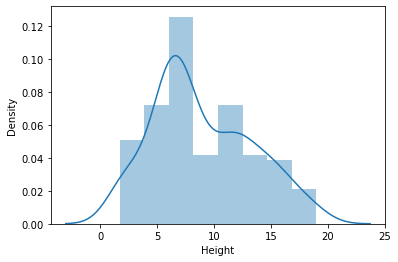

In [49]:
sns.distplot(df.Height)

<AxesSubplot:xlabel='Height'>

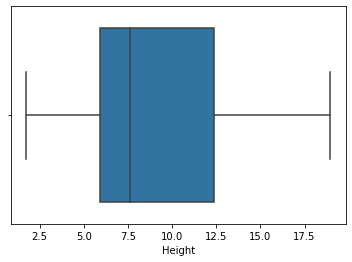

In [50]:
sns.boxplot(df.Height)

In [51]:
corr,_ = pearsonr(df.Height, df.Weight)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.815


### Pearsons Correlation: 0.815

### 5. Width

In [52]:
df.Width

0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
5      4.9274
6      5.2785
7      4.6900
8      4.8438
9      4.9594
10     5.1042
11     4.8146
12     4.3680
13     5.0728
14     5.1708
15     5.5800
16     5.2854
17     5.1975
18     5.1338
19     5.7276
20     5.5695
21     5.3704
22     5.2801
23     6.1306
24     5.5890
25     6.0532
26     6.0900
27     5.8515
28     6.1984
29     6.6030
30     6.3063
31     6.2920
32     6.7497
33     6.7473
34     6.3705
35     2.2680
36     2.8217
37     2.9044
38     3.1746
39     3.5742
40     3.3516
41     3.3957
42     3.2943
43     3.7544
44     3.5478
45     3.8203
46     3.3250
47     3.8000
48     3.8352
49     3.6312
50     4.1272
51     3.9060
52     4.4968
53     4.7736
54     5.3550
55     4.2476
56     4.2485
57     4.6816
58     6.5620
59     6.5736
60     6.5250
61     2.3265
62     2.3142
63     2.6730
64     2.9181
65     3.2928
66     3.2944
67     3.4104
68     3.1571
69     3.6636
70     4.1440
71    

In [53]:
df.Width.value_counts()

3.5250    3
1.1484    2
4.1440    2
3.6240    2
4.3350    2
4.0200    1
3.6835    1
4.2390    1
5.1373    1
4.5662    1
4.2042    1
4.6354    1
3.8250    1
4.7716    1
6.0180    1
6.3875    1
7.7957    1
6.8640    1
6.7408    1
6.2646    1
4.1658    1
3.7250    1
3.7230    1
7.4934    1
3.6260    1
3.6300    1
3.9950    1
3.4075    1
3.5340    1
3.6675    1
3.3075    1
3.5550    1
2.7720    1
3.0368    1
3.0502    1
3.1234    1
3.3216    1
6.3666    1
6.0030    1
2.6316    1
7.3514    1
4.8960    1
4.8700    1
5.3760    1
6.1712    1
1.0476    1
1.1600    1
1.3800    1
1.2772    1
1.2852    1
1.2838    1
1.1659    1
1.3936    1
1.2690    1
1.2558    1
2.0672    1
5.1296    1
4.4590    1
4.3225    1
7.4165    1
7.1064    1
7.2250    1
7.4624    1
6.6300    1
6.8684    1
7.2772    1
8.1420    1
3.9770    1
7.5958    1
3.3756    1
4.1580    1
4.3844    1
4.0198    1
4.5765    1
2.9415    1
2.4320    1
4.3056    1
2.8217    1
5.5695    1
5.3704    1
5.2801    1
6.1306    1
5.5890    1
6.05

In [54]:
df.Width.isnull().sum()

0

<AxesSubplot:xlabel='Width', ylabel='Density'>

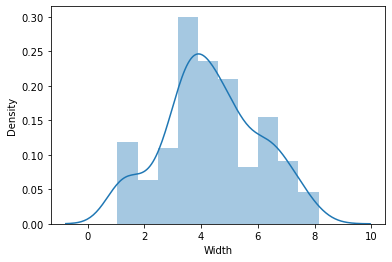

In [55]:
sns.distplot(df.Width)

<AxesSubplot:xlabel='Width'>

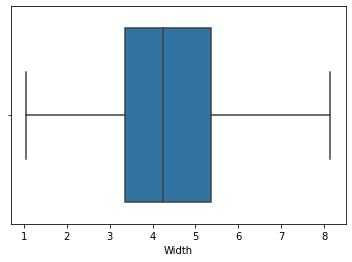

In [56]:
sns.boxplot(df.Width)

In [57]:
corr,_ = pearsonr(df.Width, df.Weight)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.926


### Pearsons Correlation: 0.926

### 6. Species

In [58]:
df.Species

0          Bream
1          Bream
2          Bream
3          Bream
4          Bream
5          Bream
6          Bream
7          Bream
8          Bream
9          Bream
10         Bream
11         Bream
12         Bream
13         Bream
14         Bream
15         Bream
16         Bream
17         Bream
18         Bream
19         Bream
20         Bream
21         Bream
22         Bream
23         Bream
24         Bream
25         Bream
26         Bream
27         Bream
28         Bream
29         Bream
30         Bream
31         Bream
32         Bream
33         Bream
34         Bream
35         Roach
36         Roach
37         Roach
38         Roach
39         Roach
40         Roach
41         Roach
42         Roach
43         Roach
44         Roach
45         Roach
46         Roach
47         Roach
48         Roach
49         Roach
50         Roach
51         Roach
52         Roach
53         Roach
54         Roach
55     Whitefish
56     Whitefish
57     Whitefish
58     Whitefi

In [59]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Smelt        14
Pike         13
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

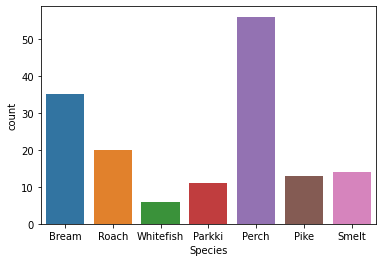

In [60]:
sns.countplot(df.Species)

In [62]:
mod_S = ols('Weight ~ Species', data = df).fit()
sm.stats.anova_lm(mod_S)

,df,sum_sq,mean_sq,F,PR(>F)
Species,6.0,5.717329e+06,952888.212641,15.099977,1.925042e-13
Residual,148.0,9.339581e+06,63105.276660,NaN,NaN


In [63]:
tukey_S = pairwise_tukeyhsd(df.Weight, df.Species, alpha = 0.05)
print(tukey_S)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1   group2   meandiff p-adj    lower     upper   reject
------------------------------------------------------------
 Bream    Parkki -463.0104  0.001 -722.5746 -203.4462   True
 Bream     Perch -235.5893  0.001 -397.3932  -73.7854   True
 Bream      Pike  -143.367  0.568 -387.2667  100.5326  False
 Bream     Roach -465.7786  0.001 -676.2672 -255.2899   True
 Bream     Smelt   -606.65  0.001 -844.1132 -369.1868   True
 Bream Whitefish  -86.8286    0.9 -418.6303  244.9731  False
Parkki     Perch  227.4211 0.0944  -20.2318   475.074  False
Parkki      Pike  319.6434 0.0361   12.0097  627.2771   True
Parkki     Roach   -2.7682    0.9 -284.6492  279.1128  False
Parkki     Smelt -143.6396 0.7642 -446.1957  158.9165  False
Parkki Whitefish  376.1818 0.0556   -4.9268  757.2905  False
 Perch      Pike   92.2223 0.8958 -138.9604  323.4049  False
 Perch     Roach -230.1893 0.0102 -425.8007  -34.5779   True
 Perch     Smelt -371.06

In [64]:
df.Species.replace('Pike','Bream',inplace=True)
df.Species.replace('Whitefish','Bream',inplace=True)
df.Species.replace('Perch','Parkki',inplace=True)
df.Species.replace('Roach','Parkki',inplace=True)
df.Species.replace('Smelt','Parkki',inplace=True)

In [65]:
tukey_S = pairwise_tukeyhsd(df.Weight, df.Species, alpha = 0.05)
print(tukey_S)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj  lower     upper   reject
-------------------------------------------------------
 Bream Parkki -313.2122 0.001 -404.936 -221.4885   True
-------------------------------------------------------


<AxesSubplot:xlabel='Species', ylabel='count'>

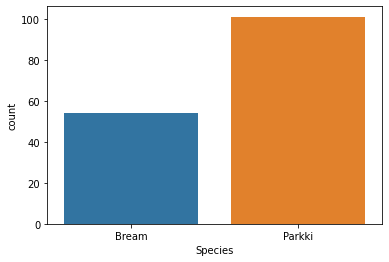

In [66]:
sns.countplot(df.Species)

In [67]:
mod_S = ols('Weight ~ Species', data = df).fit()
sm.stats.anova_lm(mod_S)

,df,sum_sq,mean_sq,F,PR(>F)
Species,1.0,3.451921e+06,3.451921e+06,45.510068,2.939613e-10
Residual,153.0,1.160499e+07,7.584960e+04,NaN,NaN


# Model Building

Weight     1.000000
Length1    0.890173
Length2    0.894415
Length3    0.902576
Height     0.815237
Width      0.925664
Name: Weight, dtype: float64

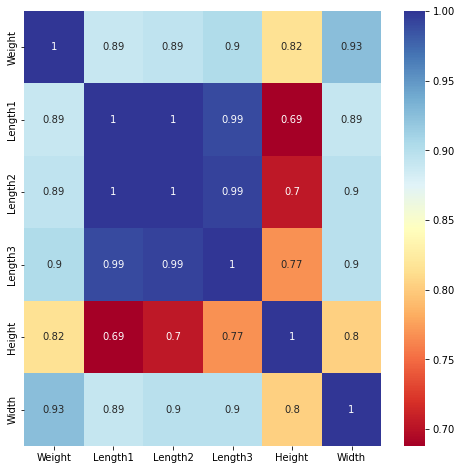

In [70]:
fig, ax = plt.subplots(figsize = (8,8)) 
sns.heatmap(df.corr(),annot = True, cmap='RdYlBu')
df.corr()['Weight']

Length2 and Length1 are Highly Correlated hence we will Drop Length2

In [71]:
df.drop('Length2', axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   Length1  155 non-null    float64
 3   Length3  155 non-null    float64
 4   Height   155 non-null    float64
 5   Width    155 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.5+ KB


#### Splitting The data into 70:30 Train & Test

In [73]:
trn = df.iloc[0:108]
tst = df.iloc[108:155]

## Model 1

In [86]:
model1 = smf.ols(formula='Weight ~ Species + Length1 + Length3 + Height + Width',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     288.0
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.13e-74
Time:                        23:20:55   Log-Likelihood:                -926.51
No. Observations:                 155   AIC:                             1865.
Df Residuals:                     149   BIC:                             1883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -332.2708     64.29

In [78]:
x_tst = tst.loc[:, tst.columns != 'Weight']
y_tst = tst.loc[:, tst.columns == 'Weight']

In [79]:
pred1 = model1.predict(x_tst)

In [80]:
y_tst_series = y_tst.iloc[:, 0]

In [81]:
resd1 = y_tst_series - pred1

In [82]:
import math

se1 = resd1.pow(2)
sse1 = se1.sum()
msse1 = sse1/len(se1)
print('RMSE: ',math.sqrt(msse1))

RMSE:  124.96866670663648


In [92]:
predict = model1.predict() 
residuals = df.Weight - predict

In [93]:
df['predict'] = predict 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   Length1  155 non-null    float64
 3   Length3  155 non-null    float64
 4   Height   155 non-null    float64
 5   Width    155 non-null    float64
 6   predict  155 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [95]:
df['residuals'] = residuals
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    155 non-null    object 
 1   Weight     155 non-null    float64
 2   Length1    155 non-null    float64
 3   Length3    155 non-null    float64
 4   Height     155 non-null    float64
 5   Width      155 non-null    float64
 6   predict    155 non-null    float64
 7   residuals  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.0+ KB


In [98]:
obs = np.arange(159) 
obs 
obsno = pd.DataFrame(obs) 

df['obsno'] = obsno 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    155 non-null    object 
 1   Weight     155 non-null    float64
 2   Length1    155 non-null    float64
 3   Length3    155 non-null    float64
 4   Height     155 non-null    float64
 5   Width      155 non-null    float64
 6   predict    155 non-null    float64
 7   residuals  155 non-null    float64
 8   obsno      155 non-null    int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 15.6+ KB


# Assumptions

## Normality

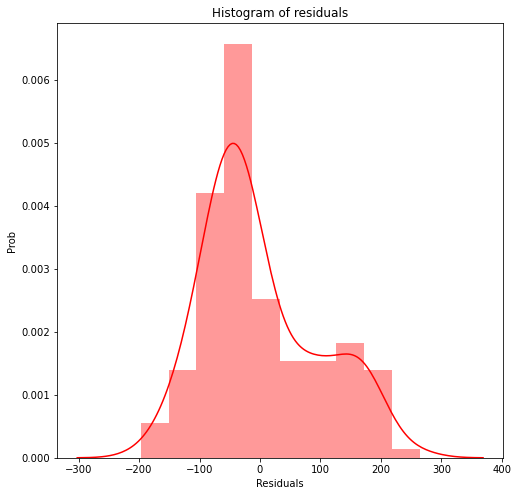

In [104]:
plt.figure(figsize=(8,8))
sns.distplot(df.residuals, color='red')
plt.title('Histogram of residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

In [100]:
numerical=df.select_dtypes(include = np.number)
print(len(numerical.columns))
numerical.columns

8


Index(['Weight', 'Length1', 'Length3', 'Height', 'Width', 'predict',
       'residuals', 'obsno'],
      dtype='object')

In [101]:
x = ['Weight', 'Length1', 'Length3', 'Height', 'Width', 'predict',
       'residuals', 'obsno']

In [102]:
df_x = df[x]

## Linearity

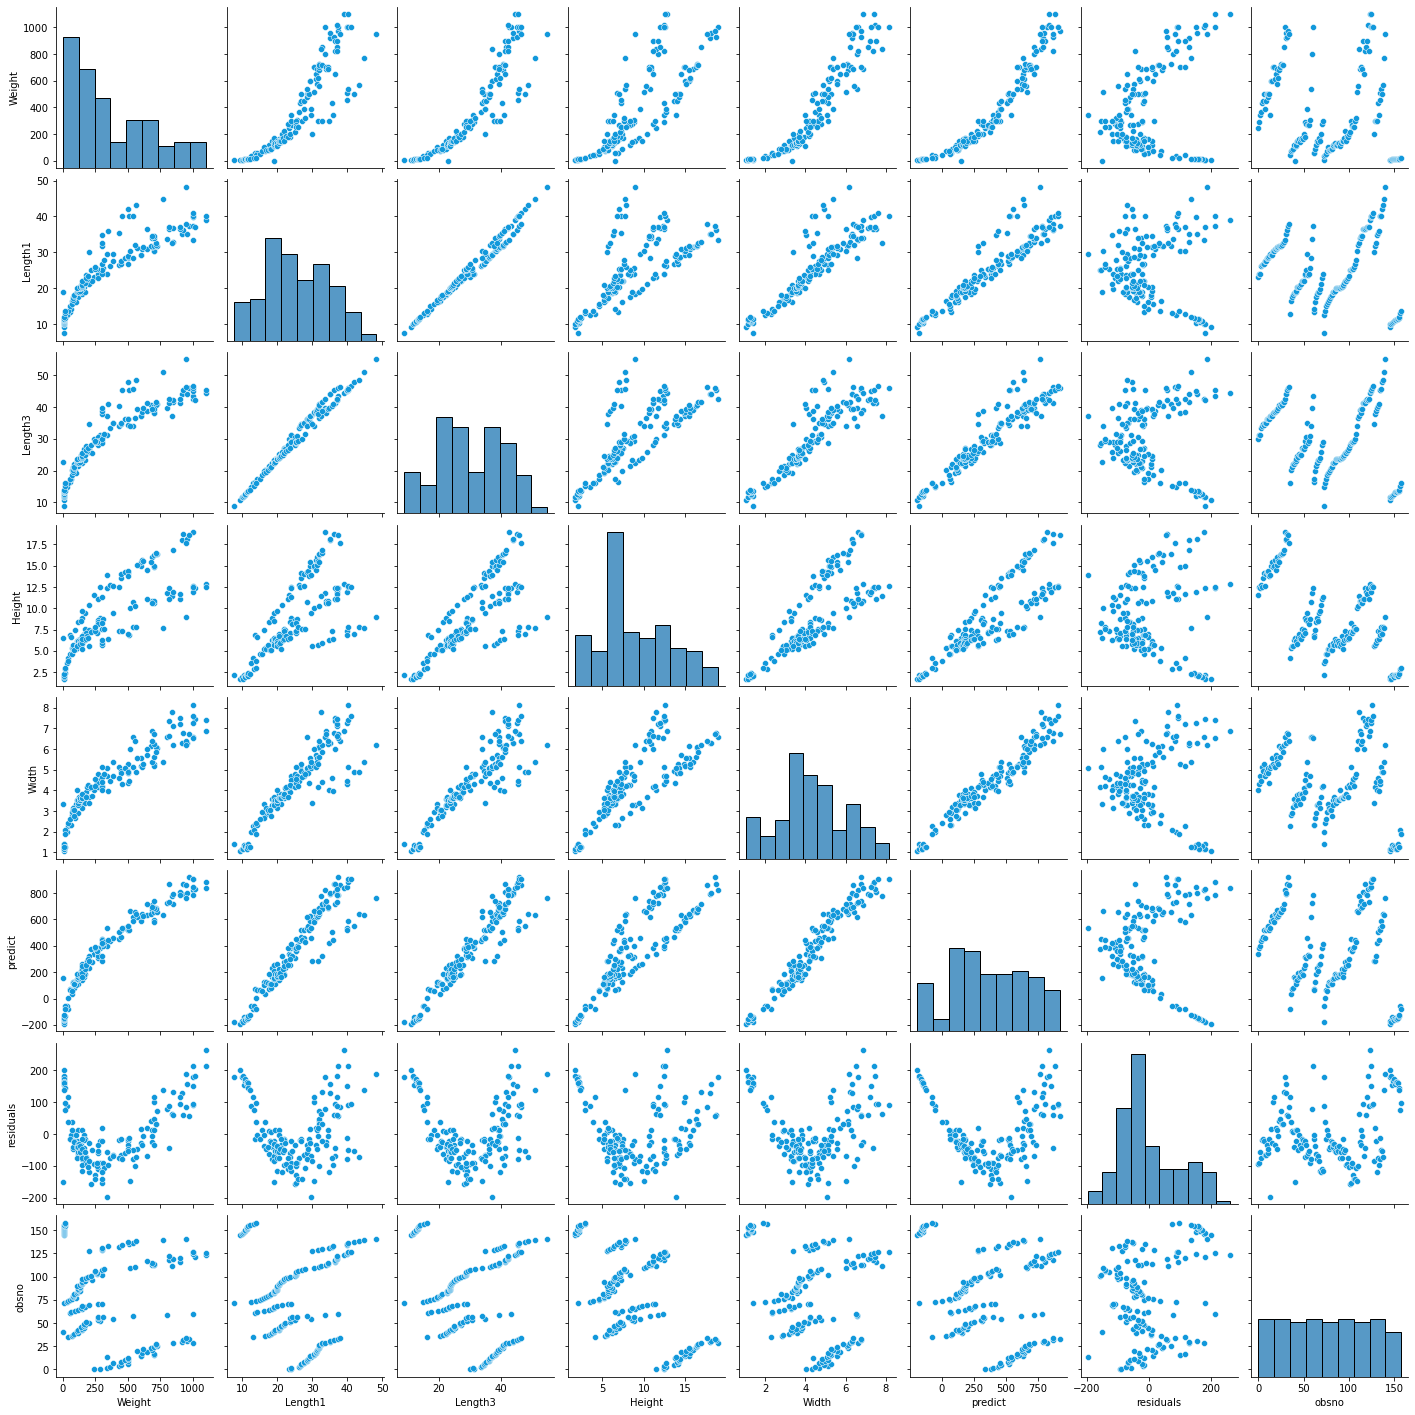

In [103]:
sns.pairplot(df_x,palette = sns.color_palette('bright'),markers = ['>'], plot_kws={'facecolors':'#1198db'})

## Independence Of Observation

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

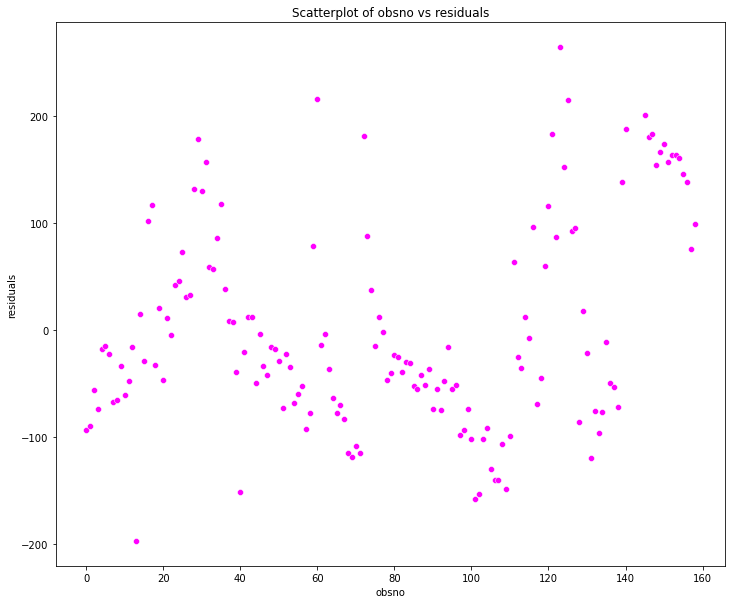

In [105]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.obsno, y=df.residuals,palette='spring_r', color='magenta',markers='+')
plt.title('Scatterplot of obsno vs residuals')

## Heteroscadasticity

Text(0.5, 1.0, 'Scatterplot of predict vs residuals')

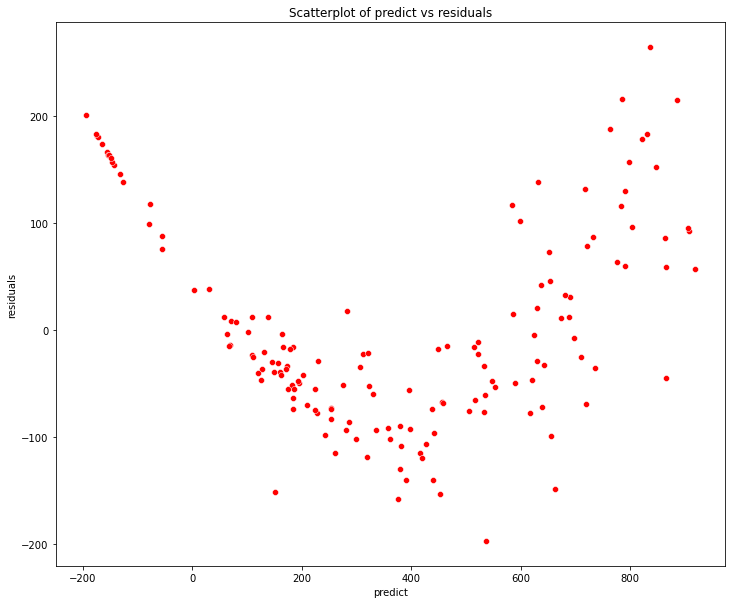

In [106]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.predict, y=df.residuals,palette='spring_r', color='red')
plt.title('Scatterplot of predict vs residuals')

In [123]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     288.0
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.13e-74
Time:                        23:50:04   Log-Likelihood:                -926.51
No. Observations:                 155   AIC:                             1865.
Df Residuals:                     149   BIC:                             1883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -332.2708     64.291     -5.168      0.000    -459.310    -205.231
Species[T.Parkki]   -53.3170     38.013     -1.403      0.163    -128.430      21.796
Length1              79.9201     17.423      4.587      0.000      45.491     114.349
Length3             -63.4335     16.733     -3.791      0.000     -96.499     -30.368
Height               42.2852      7.142      5.921      0.000      28.172      56.398
Width                57.1352     17.315      3.300      0.001      22.920      91.350
==============================================================================
Omnibus:                       11.084   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.864
Skew:                           0.652   Prob(JB):                      0.00265
Kurtosis:                       2.630   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 95% Interval

In [ ]:
155 - 2 = 153

#### 95 % confidence Interval = Coef +- T.Crit * std error

In [ ]:
print('-53.3170 +-  1.984 * 38.013')
print('-53.3170 +-  1.984 * 38.013')

## Model 2

In [85]:
model2 = smf.ols(formula='Weight ~ Species + Length3 + Height + Width',data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     312.9
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.10e-71
Time:                        23:20:51   Log-Likelihood:                -936.75
No. Observations:                 155   AIC:                             1883.
Df Residuals:                     150   BIC:                             1899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -508.6280     54.86

In [87]:
x_tst = tst.loc[:, tst.columns != 'Weight']
y_tst = tst.loc[:, tst.columns == 'Weight']

In [88]:
pred2 = model2.predict(x_tst)

In [89]:
y_tst_series = y_tst.iloc[:, 0]

In [90]:
resd2 = y_tst_series - pred2

In [91]:
import math

se2 = resd2.pow(2)
sse2 = se2.sum()
msse2 = sse2/len(se2)
print('RMSE: ',math.sqrt(msse2))

RMSE:  130.9497825270059


## Model 3

In [113]:
model3 = smf.ols(formula='Weight ~ Length3 + Height + Width',data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     414.3
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.24e-72
Time:                        23:40:48   Log-Likelihood:                -937.69
No. Observations:                 155   AIC:                             1883.
Df Residuals:                     151   BIC:                             1896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -443.0790     25.823    -17.158      0.0

In [115]:
pred3 = model3.predict(x_tst)

In [116]:
resd3 = y_tst_series - pred3

In [117]:
import math

se3 = resd3.pow(2)
sse3 = se3.sum()
msse3 = sse3/len(se3)
print('RMSE: ',math.sqrt(msse3))

RMSE:  134.24950819446772


In [107]:
df.to_csv(r'D:\fish_new.csv', index=False)